In [2]:
import numpy as np

velocity = np.load("./NS_Gauss_openfoam.npy")
print(velocity.shape)

(1177, 21, 128, 128, 2)


In [3]:
trajectory_index = 0 
time_step = 5 

u_velocity = velocity[trajectory_index, time_step, :, :, 0]  
v_velocity = velocity[trajectory_index, time_step, :, :, 1] 

print("Shape of u_velocity:", u_velocity.shape)
print("Shape of v_velocity:", v_velocity.shape)

Shape of u_velocity: (128, 128)
Shape of v_velocity: (128, 128)


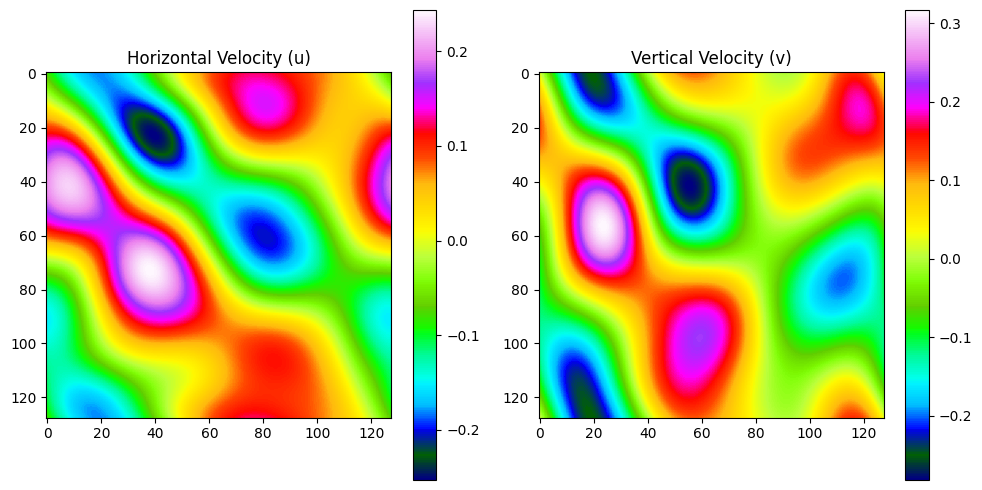

In [4]:
import matplotlib.pyplot as plt

# Plot horizontal velocity
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(u_velocity, cmap='gist_ncar')
plt.colorbar()
plt.title('Horizontal Velocity (u)')

# Plot vertical velocity
plt.subplot(1, 2, 2)
plt.imshow(v_velocity, cmap='gist_ncar')
plt.colorbar()
plt.title('Vertical Velocity (v)')

plt.tight_layout()
plt.show()

Done 0


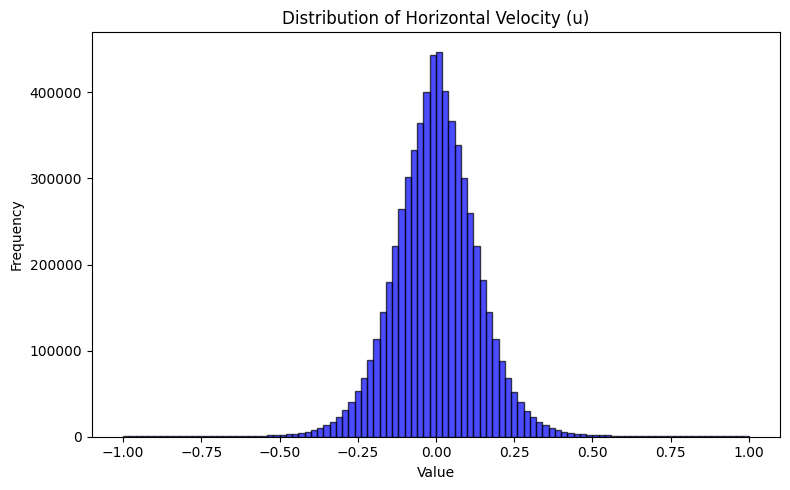

Done Horizontal Velocity (u)
Done 1


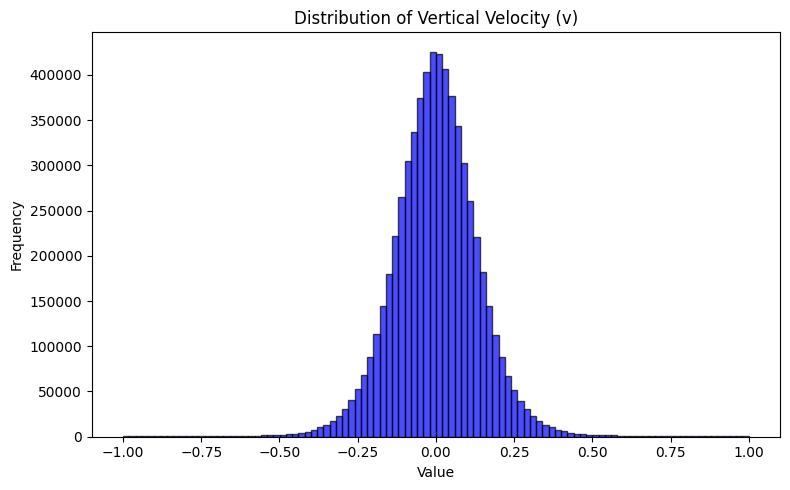

Done Vertical Velocity (v)
                             mean       std       min       max  \
Horizontal Velocity (u)  0.000141  0.142343 -1.000000  1.000000   
Vertical Velocity (v)    0.000143  0.142168 -0.999436  0.999661   

                         25th_percentile    median  75th_percentile  
Horizontal Velocity (u)        -0.082264  0.000199         0.081998  
Vertical Velocity (v)          -0.082335  0.000174         0.082074  


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute statistics for each channel
channel_names = ['Horizontal Velocity (u)', 'Vertical Velocity (v)']
stats = {}

for i, channel_name in enumerate(channel_names):
    channel_data = velocity[:, :, i, :, :].flatten()  # Flatten data for statistics
    channel_stats = {
        'mean': np.mean(channel_data),
        'std': np.std(channel_data),
        'min': np.min(channel_data),
        'max': np.max(channel_data),
        '25th_percentile': np.percentile(channel_data, 25),
        'median': np.median(channel_data),
        '75th_percentile': np.percentile(channel_data, 75)
    }
    stats[channel_name] = channel_stats
    print(f'Done {i}')

    # Plot histogram for the channel using matplotlib
    plt.figure(figsize=(8, 5))
    plt.hist(channel_data, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {channel_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f'Done {channel_name}')

# Display statistics
stats_df = pd.DataFrame(stats).T  # Transpose to view channels as rows
print(stats_df)
